In [2]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/10 15:12:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv('File_2_ID_2015_Domains_of_deprivation.csv', inferSchema=True, header=True)
df.printSchema()
df.count()

root
 |-- lsoa11cd: string (nullable = true)
 |-- LSOA_name_(2011): string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: string (nullable = true)
 |-- Multiple_Deprivation_Decile: integer (nullable = true)
 |-- Income_Rank: string (nullable = true)
 |-- Income_Decile: integer (nullable = true)
 |-- Employment_Rank: string (nullable = true)
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Rank: string (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Health_Deprivation_Rank: string (nullable = true)
 |-- Health_Deprivation_Decile: integer (nullable = true)
 |-- Crime_Rank: string (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: string (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: integer (nullable = true)
 |-- Living_Environment_Rank: string (nullable = true)
 |-- Liv

32844

In [4]:
for attributes, dtype in df.dtypes:
    print(attributes, dtype)

lsoa11cd string
LSOA_name_(2011) string
ladcd string
Local_Authority_District_name_(2013) string
Multiple_Deprivation_Rank string
Multiple_Deprivation_Decile int
Income_Rank string
Income_Decile int
Employment_Rank string
Employment_Decile int
Education_Rank string
Education_Decile int
Health_Deprivation_Rank string
Health_Deprivation_Decile int
Crime_Rank string
Crime_Decile int
Barriers_to_Housing_and_Services_Rank string
Barriers_to_Housing_and_Services_Decile int
Living_Environment_Rank string
Living_Environment_Decile int


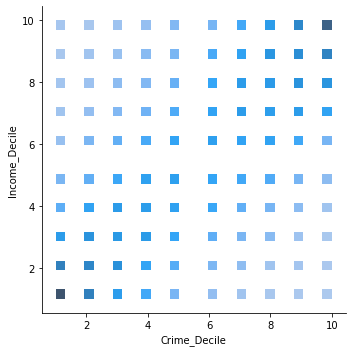

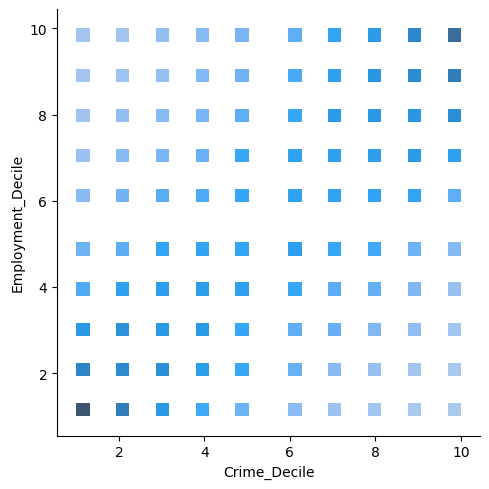

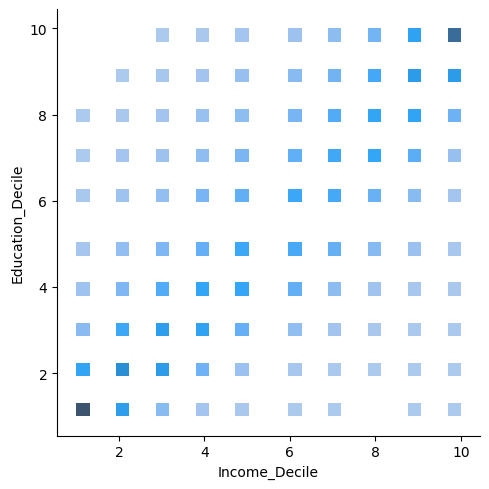

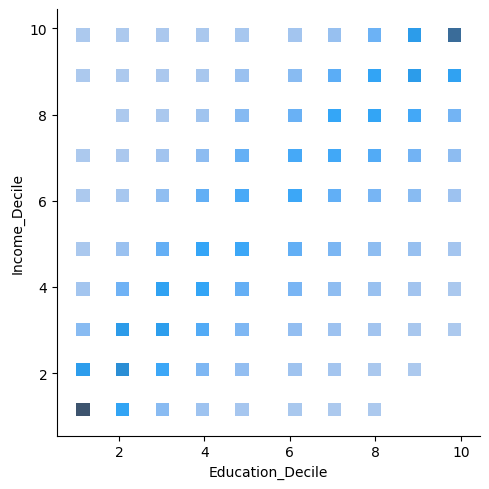

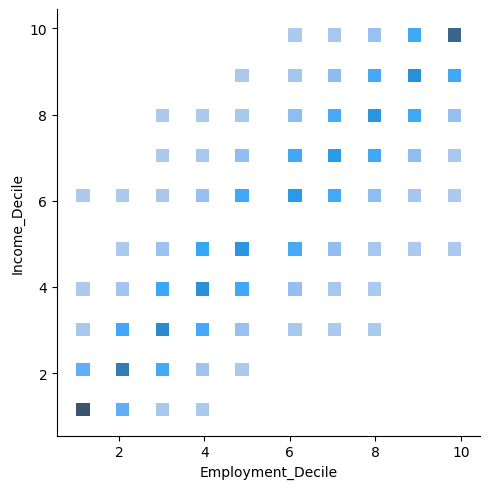

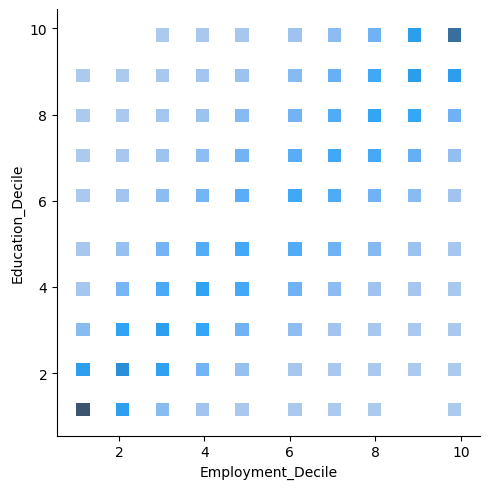

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_data = df.toPandas()

sns.displot(data=pandas_data, x="Crime_Decile", y="Income_Decile")
sns.displot(data=pandas_data, x="Crime_Decile", y="Employment_Decile")
sns.displot(data=pandas_data, x="Income_Decile", y="Education_Decile")
sns.displot(data=pandas_data, x="Education_Decile", y="Income_Decile")
sns.displot(data=pandas_data, x="Employment_Decile", y="Income_Decile")
sns.displot(data=pandas_data, x="Employment_Decile", y="Education_Decile")

In [6]:
from pyspark.sql.functions import *

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical = True)


-RECORD 0--------------------------------------
 lsoa11cd                                | 0   
 LSOA_name_(2011)                        | 0   
 ladcd                                   | 0   
 Local_Authority_District_name_(2013)    | 0   
 Multiple_Deprivation_Rank               | 0   
 Multiple_Deprivation_Decile             | 0   
 Income_Rank                             | 3   
 Income_Decile                           | 0   
 Employment_Rank                         | 0   
 Employment_Decile                       | 0   
 Education_Rank                          | 1   
 Education_Decile                        | 0   
 Health_Deprivation_Rank                 | 22  
 Health_Deprivation_Decile               | 0   
 Crime_Rank                              | 0   
 Crime_Decile                            | 0   
 Barriers_to_Housing_and_Services_Rank   | 3   
 Barriers_to_Housing_and_Services_Decile | 0   
 Living_Environment_Rank                 | 0   
 Living_Environment_Decile              

In [7]:
df.show(1,vertical = True)
print("Total Number of Rows:", df.count())
print("Total Number of Columns:", len(df.columns))

-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 LSOA_name_(2011)                        | Adur 001A 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21,352    
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18,992    
 Income_Decile                           | 6         
 Employment_Rank                         | 19,305    
 Employment_Decile                       | 6         
 Education_Rank                          | 13,727    
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25,876    
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12,817    
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28,166    
 Barriers_to_Housing_and_Ser

In [8]:
df.createOrReplaceTempView('new_data')
new_data = spark.sql("SELECT * FROM new_data WHERE Multiple_Deprivation_Decile <= 7")
new_data.show(1,vertical =True)
print("Total Number of Rows:", new_data.count())

-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 LSOA_name_(2011)                        | Adur 001A 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21,352    
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18,992    
 Income_Decile                           | 6         
 Employment_Rank                         | 19,305    
 Employment_Decile                       | 6         
 Education_Rank                          | 13,727    
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25,876    
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12,817    
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28,166    
 Barriers_to_Housing_and_Ser

In [9]:
selected_data = new_data.drop("LSOA_name_(2011)")

selected_data.show(1, vertical = True)
print("Total Number of Columns:", len(selected_data.columns))


-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21,352    
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18,992    
 Income_Decile                           | 6         
 Employment_Rank                         | 19,305    
 Employment_Decile                       | 6         
 Education_Rank                          | 13,727    
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25,876    
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12,817    
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28,166    
 Barriers_to_Housing_and_Services_Decile | 9         
 Living_Environment_Rank    

In [10]:
selected_data.printSchema()

root
 |-- lsoa11cd: string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: string (nullable = true)
 |-- Multiple_Deprivation_Decile: integer (nullable = true)
 |-- Income_Rank: string (nullable = true)
 |-- Income_Decile: integer (nullable = true)
 |-- Employment_Rank: string (nullable = true)
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Rank: string (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Health_Deprivation_Rank: string (nullable = true)
 |-- Health_Deprivation_Decile: integer (nullable = true)
 |-- Crime_Rank: string (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: string (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: integer (nullable = true)
 |-- Living_Environment_Rank: string (nullable = true)
 |-- Living_Environment_Decile: integer (nullable = true

In [11]:
import pandas as pd
from pyspark.sql.functions import col

pandas_df = selected_data.toPandas()
pandas_df = pandas_df.replace(",", "", regex = True)

new_data = spark.createDataFrame(pandas_df) 



selected_columns = ["Multiple_Deprivation_Rank","Income_Rank","Employment_Rank","Education_Rank","Health_Deprivation_Rank",
                    "Crime_Rank","Barriers_to_Housing_and_Services_Rank","Living_Environment_Rank"]

for c in selected_columns:
    new_data = new_data.withColumn(c ,new_data[c] .cast("int"))
    
new_data.printSchema()

root
 |-- lsoa11cd: string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: integer (nullable = true)
 |-- Multiple_Deprivation_Decile: long (nullable = true)
 |-- Income_Rank: integer (nullable = true)
 |-- Income_Decile: long (nullable = true)
 |-- Employment_Rank: integer (nullable = true)
 |-- Employment_Decile: long (nullable = true)
 |-- Education_Rank: integer (nullable = true)
 |-- Education_Decile: long (nullable = true)
 |-- Health_Deprivation_Rank: integer (nullable = true)
 |-- Health_Deprivation_Decile: long (nullable = true)
 |-- Crime_Rank: integer (nullable = true)
 |-- Crime_Decile: long (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: long (nullable = true)
 |-- Living_Environment_Rank: integer (nullable = true)
 |-- Living_Environment_Decile: long (nullable = true)



In [12]:
new_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in new_data.columns]).show(vertical = True)

22/10/10 15:13:12 WARN TaskSetManager: Stage 19 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0--------------------------------------
 lsoa11cd                                | 0   
 ladcd                                   | 0   
 Local_Authority_District_name_(2013)    | 0   
 Multiple_Deprivation_Rank               | 0   
 Multiple_Deprivation_Decile             | 0   
 Income_Rank                             | 2   
 Income_Decile                           | 0   
 Employment_Rank                         | 0   
 Employment_Decile                       | 0   
 Education_Rank                          | 1   
 Education_Decile                        | 0   
 Health_Deprivation_Rank                 | 19  
 Health_Deprivation_Decile               | 0   
 Crime_Rank                              | 0   
 Crime_Decile                            | 0   
 Barriers_to_Housing_and_Services_Rank   | 1   
 Barriers_to_Housing_and_Services_Decile | 0   
 Living_Environment_Rank                 | 0   
 Living_Environment_Decile               | 0   



In [13]:
new_data = new_data.na.drop()
new_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in new_data.columns]).show(vertical = True)
print("Total Number of Rows:", new_data.count())

22/10/10 15:13:15 WARN TaskSetManager: Stage 22 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:16 WARN TaskSetManager: Stage 25 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0--------------------------------------
 lsoa11cd                                | 0   
 ladcd                                   | 0   
 Local_Authority_District_name_(2013)    | 0   
 Multiple_Deprivation_Rank               | 0   
 Multiple_Deprivation_Decile             | 0   
 Income_Rank                             | 0   
 Income_Decile                           | 0   
 Employment_Rank                         | 0   
 Employment_Decile                       | 0   
 Education_Rank                          | 0   
 Education_Decile                        | 0   
 Health_Deprivation_Rank                 | 0   
 Health_Deprivation_Decile               | 0   
 Crime_Rank                              | 0   
 Crime_Decile                            | 0   
 Barriers_to_Housing_and_Services_Rank   | 0   
 Barriers_to_Housing_and_Services_Decile | 0   
 Living_Environment_Rank                 | 0   
 Living_Environment_Decile               | 0   

Total Number of Rows: 22967


In [14]:
new_data.show(vertical = True)

22/10/10 15:13:16 WARN TaskSetManager: Stage 28 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21352     
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18992     
 Income_Decile                           | 6         
 Employment_Rank                         | 19305     
 Employment_Decile                       | 6         
 Education_Rank                          | 13727     
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25876     
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12817     
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28166     
 Barriers_to_Housing_and_Services_Decile | 9         
 Living_Environment_Rank    

In [15]:
check_outlier_columns = ["Income_Rank","Income_Decile","Employment_Rank","Employment_Decile"]

bounds = {}

for c in check_outlier_columns:
    
    quantile = new_data.approxQuantile(c, [0.25, 0.75],0.1)
    IQR = quantile[1] - quantile[0]
    bounds[c] = [quantile[0] - 1.5 * IQR,quantile[1] + 1.5 * IQR]
    
print(bounds)




22/10/10 15:13:17 WARN TaskSetManager: Stage 29 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:17 WARN TaskSetManager: Stage 30 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:18 WARN TaskSetManager: Stage 31 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:19 WARN TaskSetManager: Stage 32 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


{'Income_Rank': [-6794.5, 28313.5], 'Income_Decile': [-2.5, 9.5], 'Employment_Rank': [-6900.5, 28239.5], 'Employment_Decile': [-2.5, 9.5]}


In [16]:
outliers = new_data.select(*["lsoa11cd"]+[((new_data[c] < bounds[c][0]) |(new_data[c]>bounds[c][1])).alias(c+"_status") 
                                          for c in check_outlier_columns])

outliers.show(100)

join_status = new_data.join(outliers, on='lsoa11cd')
number_of_outliers = join_status.filter("Income_Rank_status"
                                        or"Income_Decile_status"
                                        or"Employment_Rank_status"
                                        or"Employment_Decile_status").count()

print("Total Number of Outliers:",number_of_outliers)

22/10/10 15:13:19 WARN TaskSetManager: Stage 33 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


+---------+------------------+--------------------+----------------------+------------------------+
| lsoa11cd|Income_Rank_status|Income_Decile_status|Employment_Rank_status|Employment_Decile_status|
+---------+------------------+--------------------+----------------------+------------------------+
|E01031349|             false|               false|                 false|                   false|
|E01031350|             false|               false|                 false|                   false|
|E01031351|             false|               false|                 false|                   false|
|E01031352|             false|               false|                 false|                   false|
|E01031370|             false|               false|                 false|                   false|
|E01031374|             false|               false|                 false|                   false|
|E01031365|             false|               false|                 false|                   false|


22/10/10 15:13:20 WARN TaskSetManager: Stage 34 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:20 WARN TaskSetManager: Stage 35 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


Total Number of Outliers: 384


In [17]:
cleaned_data = join_status.filter(~join_status["Income_Rank_status"] 
                                  & ~join_status["Income_Decile_status"]
                                  & ~join_status["Employment_Rank_status"]
                                  & ~join_status["Employment_Decile_status"])

number_of_outliers = cleaned_data.filter("Income_Rank_status"
                                        or"Income_Decile_status"
                                        or"Employment_Rank_status"
                                        or"Employment_Decile_status").count()

print("Total Number of Outliers:",number_of_outliers)
print("Total Number of Rows:", cleaned_data.count())
print("Total Number of Columns:", len(cleaned_data.columns))

22/10/10 15:13:22 WARN TaskSetManager: Stage 43 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:22 WARN TaskSetManager: Stage 44 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


Total Number of Outliers: 0


22/10/10 15:13:23 WARN TaskSetManager: Stage 49 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:24 WARN TaskSetManager: Stage 50 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


Total Number of Rows: 22264
Total Number of Columns: 23


In [18]:
columns_need_drop =["Income_Rank_status","Income_Decile_status","Employment_Rank_status","Employment_Decile_status"]

for c in columns_need_drop:
    cleaned_data = cleaned_data.drop(c)
cleaned_data.printSchema()

root
 |-- lsoa11cd: string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: integer (nullable = true)
 |-- Multiple_Deprivation_Decile: long (nullable = true)
 |-- Income_Rank: integer (nullable = true)
 |-- Income_Decile: long (nullable = true)
 |-- Employment_Rank: integer (nullable = true)
 |-- Employment_Decile: long (nullable = true)
 |-- Education_Rank: integer (nullable = true)
 |-- Education_Decile: long (nullable = true)
 |-- Health_Deprivation_Rank: integer (nullable = true)
 |-- Health_Deprivation_Decile: long (nullable = true)
 |-- Crime_Rank: integer (nullable = true)
 |-- Crime_Decile: long (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: long (nullable = true)
 |-- Living_Environment_Rank: integer (nullable = true)
 |-- Living_Environment_Decile: long (nullable = true)



In [19]:
import pyspark.sql.functions as function

def income_tier(decile_rank):
    if decile_rank <= 3:
        return 1
    elif decile_rank > 3 and decile_rank <= 6:
        return 2
    else:
        return 3
income_tier_udf  = function.udf(income_tier,"int")
constructed_data = cleaned_data.withColumn("Income_Tier",income_tier_udf("Income_Decile"))

constructed_data.show(1,vertical =True)

22/10/10 15:13:25 WARN TaskSetManager: Stage 58 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:26 WARN TaskSetManager: Stage 59 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0--------------------------------------------
 lsoa11cd                                | E01029873 
 ladcd                                   | E07000200 
 Local_Authority_District_name_(2013)    | Babergh   
 Multiple_Deprivation_Rank               | 19819     
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 21494     
 Income_Decile                           | 7         
 Employment_Rank                         | 21655     
 Employment_Decile                       | 7         
 Education_Rank                          | 21391     
 Education_Decile                        | 7         
 Health_Deprivation_Rank                 | 27571     
 Health_Deprivation_Decile               | 9         
 Crime_Rank                              | 29004     
 Crime_Decile                            | 9         
 Barriers_to_Housing_and_Services_Rank   | 7897      
 Barriers_to_Housing_and_Services_Decile | 3         
 Living_Environment_Rank    

In [20]:
for attributes, dtype in constructed_data.dtypes:
    print(attributes, dtype)

lsoa11cd string
ladcd string
Local_Authority_District_name_(2013) string
Multiple_Deprivation_Rank int
Multiple_Deprivation_Decile bigint
Income_Rank int
Income_Decile bigint
Employment_Rank int
Employment_Decile bigint
Education_Rank int
Education_Decile bigint
Health_Deprivation_Rank int
Health_Deprivation_Decile bigint
Crime_Rank int
Crime_Decile bigint
Barriers_to_Housing_and_Services_Rank int
Barriers_to_Housing_and_Services_Decile bigint
Living_Environment_Rank int
Living_Environment_Decile bigint
Income_Tier int


22/10/10 15:13:28 WARN TaskSetManager: Stage 64 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 15:13:28 WARN TaskSetManager: Stage 65 contains a task of very large size (1286 KiB). The maximum recommended task size is 1000 KiB.


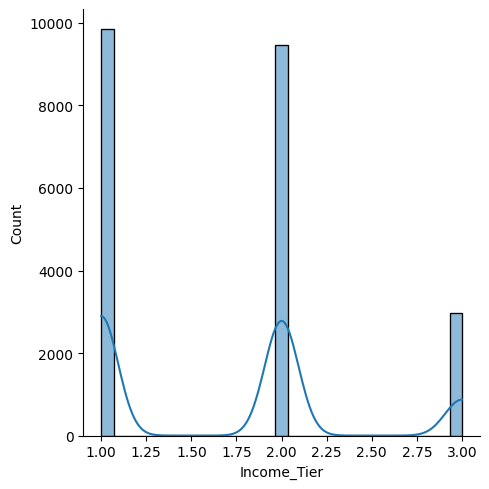

In [21]:
pandas_data = constructed_data.toPandas()
sns.displot(data=pandas_data, x="Income_Tier", kde=True)


In [22]:
# constructed_data.write.csv('constructed_data.csv',header = True)

In [23]:
constructed_data = spark.read.csv('constructed_data.csv', inferSchema=True, header=True)
conversion_table = spark.read.csv('LSOA_conversion_table.csv', inferSchema=True, header=True)

conversion_table = conversion_table.select("lsoa11cd","msoa11cd")
conversion_table.show(1,vertical = True)

# conversion_table.write.csv('conversion_needed.csv', header = True)

-RECORD 0-------------
 lsoa11cd | S01006514 
 msoa11cd | S02001237 
only showing top 1 row



In [24]:
constructed_data = spark.read.csv('constructed_data.csv', inferSchema=True,header = True)
updated_conversion = spark.read.csv('conversion_needed.csv', inferSchema=True, header = True)

merged_data = constructed_data.join(
    updated_conversion,constructed_data.lsoa11cd == updated_conversion.lsoa11cd).drop(updated_conversion.lsoa11cd)

merged_data.printSchema()
print("Total Number of Rows:", merged_data.count())

root
 |-- lsoa11cd: string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: integer (nullable = true)
 |-- Multiple_Deprivation_Decile: integer (nullable = true)
 |-- Income_Rank: integer (nullable = true)
 |-- Income_Decile: integer (nullable = true)
 |-- Employment_Rank: integer (nullable = true)
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Rank: integer (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Health_Deprivation_Rank: integer (nullable = true)
 |-- Health_Deprivation_Decile: integer (nullable = true)
 |-- Crime_Rank: integer (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: integer (nullable = true)
 |-- Living_Environment_Rank: integer (nullable = true)
 |-- Living_Environment_Decile: integer (nullabl

Total Number of Rows: 1471963


-RECORD 0---------------------------------------------
 lsoa11cd                                | E01022448  
 ladcd                                   | E07000083  
 Local_Authority_District_name_(2013)    | Tewkesbury 
 Multiple_Deprivation_Rank               | 13509      
 Multiple_Deprivation_Decile             | 5          
 Income_Rank                             | 13579      
 Income_Decile                           | 5          
 Employment_Rank                         | 10734      
 Employment_Decile                       | 4          
 Education_Rank                          | 11614      
 Education_Decile                        | 4          
 Health_Deprivation_Rank                 | 16005      
 Health_Deprivation_Decile               | 5          
 Crime_Rank                              | 20454      
 Crime_Decile                            | 7          
 Barriers_to_Housing_and_Services_Rank   | 5735       
 Barriers_to_Housing_and_Services_Decile | 2          
 Living_En

Total Number of Rows: 22264


<AxesSubplot:xlabel='Income_Rank', ylabel='Employment_Rank'>

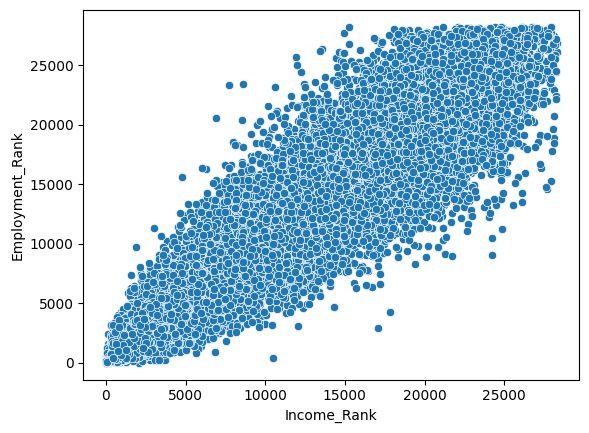

In [25]:
distinct_data = merged_data.distinct()

distinct_data.show(1,vertical = True)
print("Total Number of Rows:", distinct_data.count())
pandas_data = distinct_data.toPandas()

sns.scatterplot(data = pandas_data, x = "Income_Rank", y = "Employment_Rank")

In [26]:
# distinct_data.write.csv('distinct_data.csv',header = True)

In [27]:
reduced_data = distinct_data.select("Employment_Decile","Education_Decile","Crime_Decile","Living_Environment_Decile","Income_Tier")
reduced_data.printSchema()

root
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Living_Environment_Decile: integer (nullable = true)
 |-- Income_Tier: integer (nullable = true)



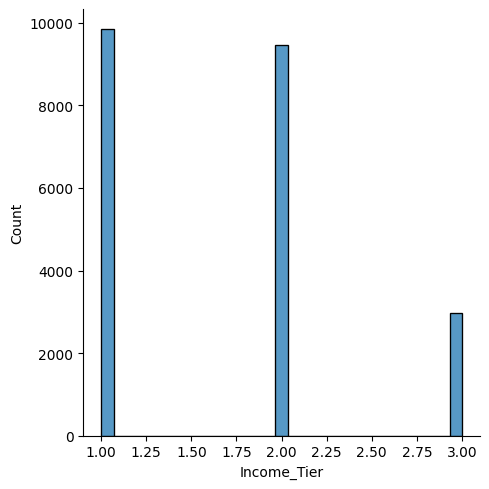

In [28]:
pandas_data = reduced_data.toPandas()
sns.displot(data=pandas_data, x="Income_Tier")

In [29]:
from pyspark.ml.feature import RFormula as rf

formula = rf(formula = "Income_Tier~.", featuresCol = "features",labelCol = "label")
result = formula.fit(reduced_data).transform(reduced_data)
vector = result.select("features","label")
vector.show(5)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[4.0,4.0,7.0,7.0]|  2.0|
|[2.0,1.0,6.0,1.0]|  1.0|
|[4.0,6.0,6.0,4.0]|  2.0|
|[5.0,4.0,6.0,9.0]|  2.0|
|[5.0,3.0,5.0,8.0]|  2.0|
+-----------------+-----+
only showing top 5 rows



In [30]:
from pyspark.ml.classification import RandomForestClassifier as rfc

config = rfc(numTrees = int(9),maxDepth = int(5), labelCol = "label", seed = 11)
result = config.fit(vector)

importance = result.featureImportances
importanceList=[float(c) for c in  importance]

column_list = reduced_data.columns
score=dict(zip(column_list,importanceList))
print(score)

{'Employment_Decile': 0.9331414582156595, 'Education_Decile': 0.03478344535195206, 'Crime_Decile': 0.027912419306518665, 'Living_Environment_Decile': 0.004162677125869923}


In [31]:
reduced_data = reduced_data.drop("Living_Environment_Decile")
reduced_data.printSchema()

root
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Income_Tier: integer (nullable = true)



In [32]:
from pyspark.sql.functions import explode, array, lit

tier1 = reduced_data.filter(col("Income_Tier") == 1)
tier2 = reduced_data.filter(col("Income_Tier") == 2)
tier3 = reduced_data.filter(col("Income_Tier") == 3)

tier1_over_tier2 = int(tier1.count()/tier2.count())
tier1_over_tier3 = int(tier1.count()/tier3.count())

tier2_range = range(tier1_over_tier2)
tier3_range = range(tier1_over_tier3)

oversampled_1 = tier2.withColumn("dummy", explode(array([lit(c) for c in tier2_range]))).drop('dummy')
oversampled_2 = tier3.withColumn("dummy", explode(array([lit(c) for c in tier3_range]))).drop('dummy')

oversampled_data = oversampled_1.unionAll(oversampled_2)
resampled_data = tier1.unionAll(oversampled_data)

resampled_data.groupBy('Income_Tier').count().show()

resampled_data.show(10)
resampled_data.printSchema()
print('Total Number of Rows: ', resampled_data.count())

+-----------+-----+
|Income_Tier|count|
+-----------+-----+
|          1| 9845|
|          2| 9455|
|          3| 8892|
+-----------+-----+



+-----------------+----------------+------------+-----------+
|Employment_Decile|Education_Decile|Crime_Decile|Income_Tier|
+-----------------+----------------+------------+-----------+
|                2|               1|           6|          1|
|                1|               2|           3|          1|
|                1|               4|           3|          1|
|                3|               2|           1|          1|
|                3|               2|           6|          1|
|                1|               2|           1|          1|
|                1|               1|           2|          1|
|                1|               1|           2|          1|
|                4|               5|           3|          1|
|                1|               1|           1|          1|
+-----------------+----------------+------------+-----------+
only showing top 10 rows

root
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |

Total Number of Rows:  28192


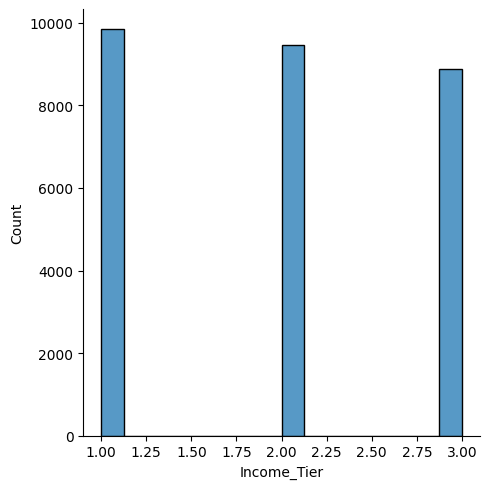

In [33]:
pandas_data = resampled_data.toPandas()
sns.displot(data=pandas_data, x="Income_Tier")

In [34]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

formula = rf(formula = "Income_Tier~.", featuresCol = "Features",labelCol = "Income_Tier")
final_result = formula.fit(resampled_data).transform(resampled_data)
final_vector = final_result.select("Features","Income_Tier")
final_vector.show(5)

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Income_Tier", predictionCol="prediction", metricName="accuracy")

deicison_tree = DecisionTreeClassifier(labelCol='Income_Tier',featuresCol='Features')
dtc_model = deicison_tree.fit(final_vector)
dtc_predictions = dtc_model.transform(final_vector)
dtc_accuracy = accuracy_evaluator.evaluate(dtc_predictions)

convert = dtc_accuracy * 100
print(convert,"%")

+-------------+-----------+
|     Features|Income_Tier|
+-------------+-----------+
|[2.0,1.0,6.0]|          1|
|[1.0,2.0,3.0]|          1|
|[1.0,4.0,3.0]|          1|
|[3.0,2.0,1.0]|          1|
|[3.0,2.0,6.0]|          1|
+-------------+-----------+
only showing top 5 rows



78.79185584562997 %


In [36]:
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier(labelCol='Income_Tier',featuresCol='Features')
rfc_model = rfc.fit(final_vector)
rfc_predictions = rfc_model.transform(final_vector)
rfc_accuracy = accuracy_evaluator.evaluate(rfc_predictions)

convert = rfc_accuracy * 100
print(convert,"%")


78.47261634506243 %


In [37]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'Features',labelCol = 'Income_Tier')
lr_model = lr.fit(final_vector)
lr_predictions = dtc_model.transform(final_vector)
lr_accuracy = accuracy_evaluator.evaluate(lr_predictions)

convert = lr_accuracy * 100
print(convert,"%")




22/10/10 15:19:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/10 15:19:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


78.79185584562997 %


In [38]:
(train_set,test_set) = final_vector.randomSplit([0.8,0.2])
print("Number of Training Instance:",train_set.count())
print("Number of Testing Instance:",test_set.count())


Number of Training Instance: 22688


Number of Testing Instance: 5504


In [39]:
deicison_tree = DecisionTreeClassifier(labelCol='Income_Tier',featuresCol='Features')
dtc_model = deicison_tree.fit(train_set)
dtc_predictions = dtc_model.transform(test_set)
dtc_accuracy = accuracy_evaluator.evaluate(dtc_predictions)

dtc_predictions.show(10)
convert = dtc_accuracy * 100
print(convert,"%")

+-------------+-----------+--------------------+--------------------+----------+
|     Features|Income_Tier|       rawPrediction|         probability|prediction|
+-------------+-----------+--------------------+--------------------+----------+
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,5179.0,84.0,...|[0.0,0.9840395211...|       1.0|
|[1.0,1.0,1.0]|          1|[

In [40]:
deicison_tree = DecisionTreeClassifier(labelCol='Income_Tier',featuresCol='Features', maxDepth = 15)
dtc_model = deicison_tree.fit(train_set)
dtc_predictions = dtc_model.transform(test_set)
dtc_accuracy = accuracy_evaluator.evaluate(dtc_predictions)

dtc_predictions.show(10)
convert = dtc_accuracy * 100
print(convert,"%")

+-------------+-----------+--------------------+--------------------+----------+
|     Features|Income_Tier|       rawPrediction|         probability|prediction|
+-------------+-----------+--------------------+--------------------+----------+
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[0.0,3779.0,13.0,...|[0.0,0.9965717299...|       1.0|
|[1.0,1.0,1.0]|          1|[

In [41]:
features = dtc_model.featureImportances
importance_list = [float(c) for c in features]

column_list = resampled_data.columns
score=dict(zip(column_list,importance_list))
print(score)

{'Employment_Decile': 0.9035516713828772, 'Education_Decile': 0.04019466980771247, 'Crime_Decile': 0.05625365880941039}


In [45]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder

param_grid = ParamGridBuilder().addGrid(deicison_tree.maxDepth, [15]).build()
cv = CrossValidator(estimator=deicison_tree,estimatorParamMaps=param_grid,evaluator=accuracy_evaluator,numFolds=10)

cv_model = cv.fit(train_set)
cv_predictions = cv_model.transform(test_set)

KeyboardInterrupt: 